In [30]:
# Read log_orig.log file
with open('log_orig.log', 'r') as f:
    log_data_orig = f.read()
with open('results/ogbl-ddi_20241212200144/log.log', 'r') as f:
    log_data = f.read()

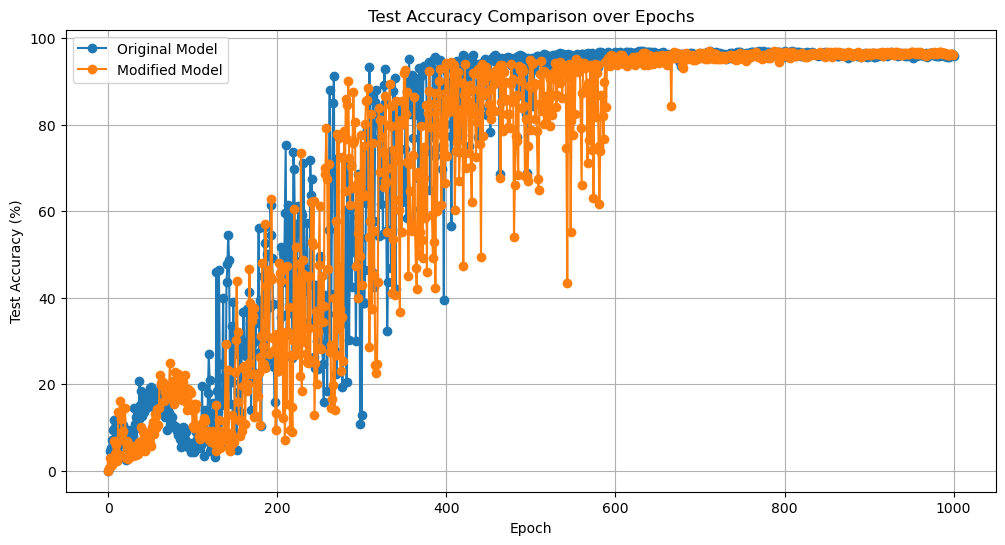

In [31]:
import matplotlib.pyplot as plt
import re

# Parse both logs
pattern = r"Epoch: (\d+), Loss: [\d.]+, Valid: [\d.]+%, Test: ([\d.]+)%"

# Parse log_data
epochs = []
test_values = []
matches = re.findall(pattern, log_data)
for match in matches:
    epochs.append(int(match[0]))
    test_values.append(float(match[1]))

# Parse log_data_orig 
epochs_orig = []
test_values_orig = []
matches_orig = re.findall(pattern, log_data_orig)
for match in matches_orig:
    epochs_orig.append(int(match[0]))
    test_values_orig.append(float(match[1]))

e_size = 1000
# Plot both sets of values
plt.figure(figsize=(12, 6))
plt.plot([e for e in epochs_orig if e <= e_size], 
         [v for e,v in zip(epochs_orig, test_values_orig) if e <= e_size],
         label="Original Model", marker="o")
plt.plot([e for e in epochs if e <= e_size],
         [v for e,v in zip(epochs, test_values) if e <= e_size], 
         label="Modified Model", marker="o")
plt.title("Test Accuracy Comparison over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy (%)")
plt.grid(True)
plt.legend()
plt.show()


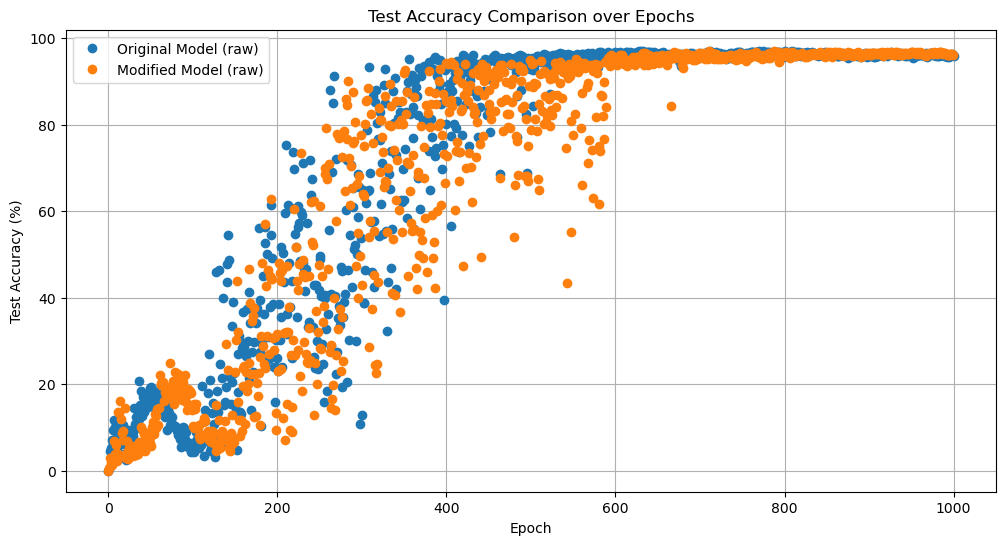

In [35]:
import numpy as np

# Plot both sets of values
plt.figure(figsize=(12, 6))

# Calculate moving averages with window size 10
window = 10
orig_epochs = [e for e in epochs_orig if e <= e_size]
orig_values = [v for e,v in zip(epochs_orig, test_values_orig) if e <= e_size]
mod_epochs = [e for e in epochs if e <= e_size]
mod_values = [v for e,v in zip(epochs, test_values) if e <= e_size]

orig_mean = np.convolve(orig_values, np.ones(window)/window, mode='valid')
mod_mean = np.convolve(mod_values, np.ones(window)/window, mode='valid')

# Plot raw data points
plt.plot(orig_epochs, orig_values, 'o', alpha=1, label="Original Model (raw)")
plt.plot(mod_epochs, mod_values, 'o', alpha=1, label="Modified Model (raw)")

# Plot moving averages
#plt.plot(orig_epochs[window-1:], orig_mean, '-', linewidth=2, label="Original Model (moving avg)")
#plt.plot(mod_epochs[window-1:], mod_mean, '-', linewidth=2, label="Modified Model (moving avg)")

plt.title("Test Accuracy Comparison over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy (%)")
plt.grid(True)
plt.legend()
plt.show()


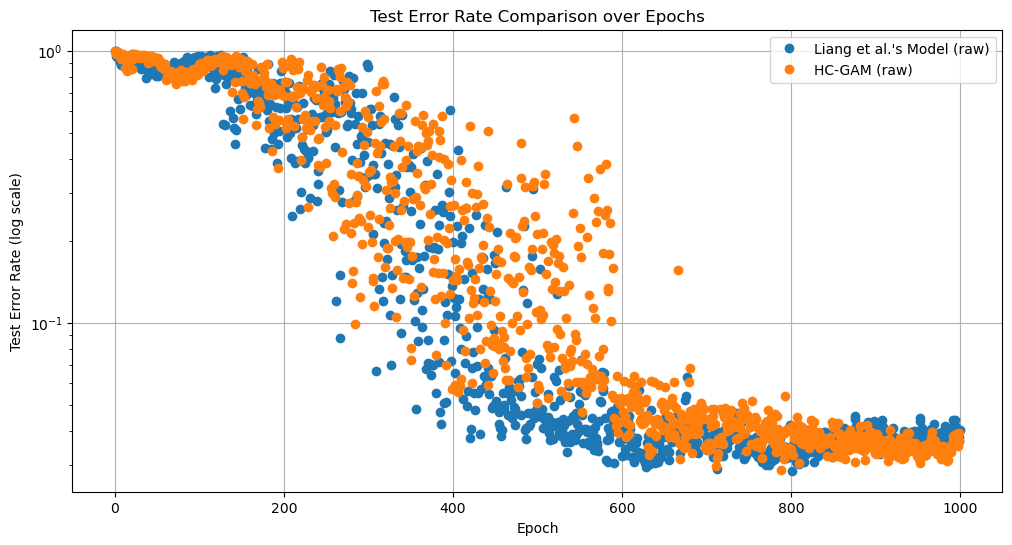

In [33]:
import numpy as np

# Plot both sets of values
plt.figure(figsize=(12, 6))

# Calculate moving averages with window size 10
window = 15
orig_epochs = [e for e in epochs_orig if e <= e_size]
orig_values = [1 - v/100 for e,v in zip(epochs_orig, test_values_orig) if e <= e_size]  # Convert to error rate
mod_epochs = [e for e in epochs if e <= e_size]
mod_values = [1 - v/100 for e,v in zip(epochs, test_values) if e <= e_size]  # Convert to error rate

orig_mean = np.convolve(orig_values, np.ones(window)/window, mode='valid')
mod_mean = np.convolve(mod_values, np.ones(window)/window, mode='valid')

# Plot raw data points in log scale
plt.semilogy(orig_epochs, orig_values, 'o', alpha=0.2, label="Liang et al.'s Model (raw)")
plt.semilogy(mod_epochs, mod_values, 'o', alpha=0.2, label="HC-GAM (raw)")

# Plot moving averages in log scale
plt.semilogy(orig_epochs[window-1:], orig_mean, '-', linewidth=2, label="Liang et al. (moving avg)")
plt.semilogy(mod_epochs[window-1:], mod_mean, '-', linewidth=2, label="HC-GAM (moving avg)")

plt.title("Test Error Rate Comparison over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Test Error Rate (log scale)")
plt.grid(True)
plt.legend()
plt.show()


In [34]:
!nvidia-smi

Fri Dec 13 02:08:16 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L40S                    On  |   00000000:E1:00.0 Off |                    0 |
| N/A   30C    P0             77W /  350W |   26118MiB /  46068MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----